In [1]:
from model.vision import DGCVision

In [2]:
import cv2
import numpy as np
from os import path as osp
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20.0, 10.0)

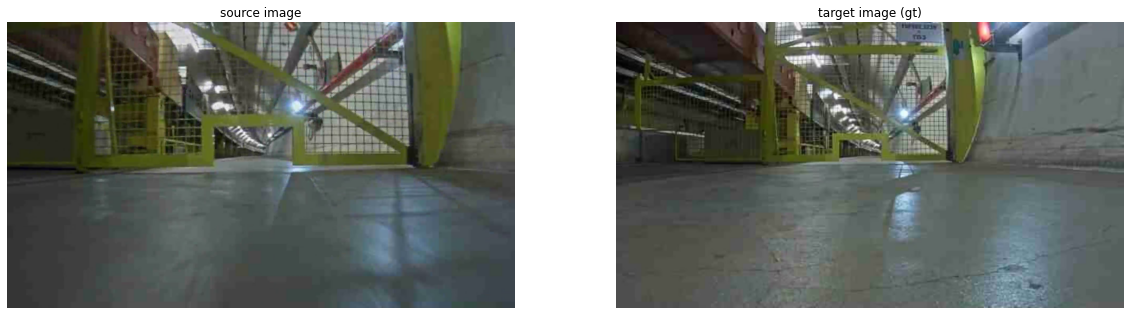

In [3]:
IMG_PATH = 'imgs/front'

img1 = cv2.cvtColor(cv2.imread(osp.join(IMG_PATH, '0060.png'), cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread(osp.join(IMG_PATH, '0001.png'), cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

plt.figure()
ax1 = plt.subplot(1, 2, 1)
ax1.imshow(img1); ax1.axis('off'); ax1.set_title('source image');
ax2 = plt.subplot(1, 2, 2)
ax2.imshow(img2); ax2.axis('off'); ax2.set_title('target image (gt)');

In [4]:
dgc = DGCVision()
dgc.predict(img1, img2)
warp_img = dgc.warp()

/home/usuario/.local/lib/python3.8/site-packages/torch/nn/functional.py:3828: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


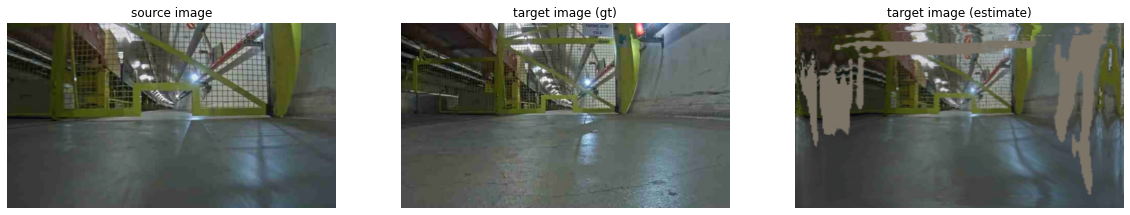

In [5]:
plt.figure()
ax1 = plt.subplot(1, 3, 1)
ax1.imshow(img1); ax1.axis('off'); ax1.set_title('source image');
ax2 = plt.subplot(1, 3, 2)
ax2.imshow(img2); ax2.axis('off'); ax2.set_title('target image (gt)');
ax3 = plt.subplot(1, 3, 3)
ax3.imshow(warp_img); ax3.axis('off'); ax3.set_title('target image (estimate)');

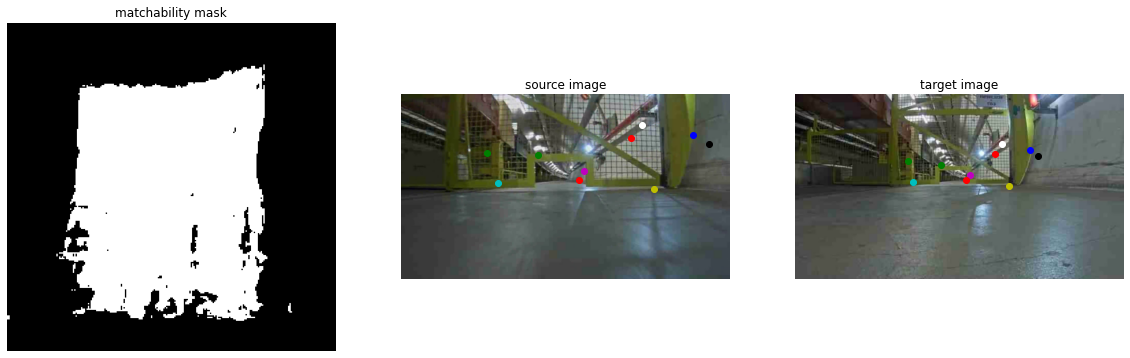

In [6]:
match_mask = dgc.getMatchabilityMask()
flow = dgc.getFlow()

import random
xt, yt, xs, ys = [], [], [], []
colors = 'rgbyckwm'
c = []

for i in range(10):
    x = random.randrange(480,1440)
    y = random.randrange(270,540)
    xt.append(x)
    yt.append(y)
    x, y = dgc.source(x,y)
    xs.append(x)
    ys.append(y)
    c.append(colors[i % len(colors)])

plt.figure()
ax1 = plt.subplot(1, 3, 1)
ax1.imshow(match_mask>0, cmap='gray'); ax1.axis('off'); ax1.set_title('matchability mask');
ax2 = plt.subplot(1, 3, 2)
ax2.imshow(img1); 
for i in range(len(c)):
    ax2.plot(xs[i], ys[i], c[i]+'o');
ax2.axis('off'); ax2.set_title('source image');
ax3 = plt.subplot(1, 3, 3)
ax3.imshow(img2); 
for i in range(len(c)):
    ax3.plot(xt[i], yt[i], c[i]+'o');
ax3.axis('off'); ax3.set_title('target image');

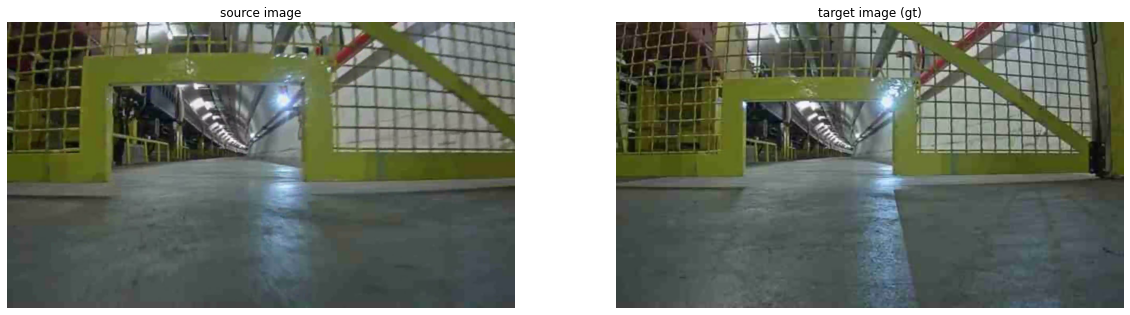

In [7]:
img1 = cv2.cvtColor(cv2.imread(osp.join(IMG_PATH, '0150.png'), cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread(osp.join(IMG_PATH, '0095.png'), cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

plt.figure()
ax1 = plt.subplot(1, 2, 1)
ax1.imshow(img1); ax1.axis('off'); ax1.set_title('source image');
ax2 = plt.subplot(1, 2, 2)
ax2.imshow(img2); ax2.axis('off'); ax2.set_title('target image (gt)');

In [8]:
dgc.predict(img1, img2)
warp_img = dgc.warp()

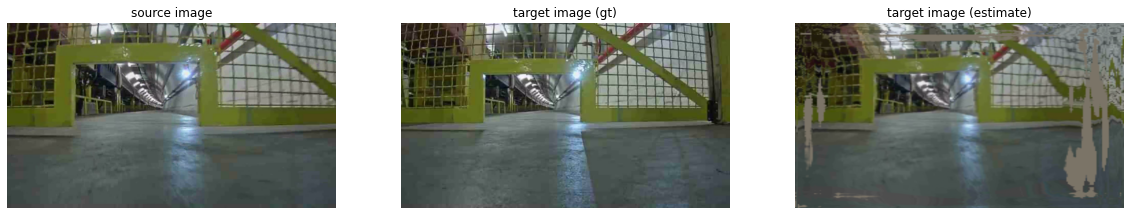

In [9]:
plt.figure()
ax1 = plt.subplot(1, 3, 1)
ax1.imshow(img1); ax1.axis('off'); ax1.set_title('source image');
ax2 = plt.subplot(1, 3, 2)
ax2.imshow(img2); ax2.axis('off'); ax2.set_title('target image (gt)');
ax3 = plt.subplot(1, 3, 3)
ax3.imshow(warp_img); ax3.axis('off'); ax3.set_title('target image (estimate)');

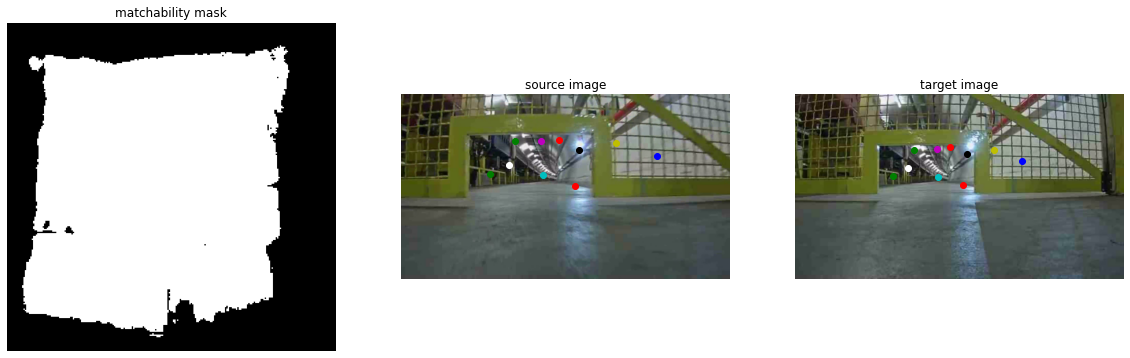

In [12]:
match_mask = dgc.getMatchabilityMask()
flow = dgc.getFlow()

import random
xt, yt, xs, ys = [], [], [], []
colors = 'rgbyckwm'
c = []

for i in range(10):
    x = random.randrange(480,1440)
    y = random.randrange(270,540)
    xt.append(x)
    yt.append(y)
    x, y = dgc.source(x,y)
    xs.append(x)
    ys.append(y)
    c.append(colors[i % len(colors)])

plt.figure()
ax1 = plt.subplot(1, 3, 1)
ax1.imshow(match_mask>0, cmap='gray'); ax1.axis('off'); ax1.set_title('matchability mask');
ax2 = plt.subplot(1, 3, 2)
ax2.imshow(img1); 
for i in range(len(c)):
    ax2.plot(xs[i], ys[i], c[i]+'o');
ax2.axis('off'); ax2.set_title('source image');
ax3 = plt.subplot(1, 3, 3)
ax3.imshow(img2); 
for i in range(len(c)):
    ax3.plot(xt[i], yt[i], c[i]+'o');
ax3.axis('off'); ax3.set_title('target image');